In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
# from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Ładowanie danych

In [2]:
iris = load_iris(as_frame=True)
wine = load_wine(as_frame=True)
glass = {}
glass['data'] = pd.read_csv('glass.data', index_col=0, header=None, names=[
    'Id', 'RI', 'Na', 'Mg',
    'Al', 'Si', 'K', 'Ca',
    'Ba', 'Fe', 'target'
])
glass['target'] = glass['data']['target']
glass['data'] = glass['data'].drop(columns=['target'])
seeds = {}
seeds['data'] = pd.read_csv('seeds_dataset.txt', sep='\t', header=None, names=[
    'area',
    'perimeter',
    'compactness',
    'length_of_kernel',
    'width_of_kernel',
    'asymmetry_coefficient',
    'length_of_kernel_groove',
    'target'
])
seeds['target'] = seeds['data']['target']
seeds['data'] = seeds['data'].drop(columns=['target'])

In [3]:
random_state = 42
def get_estimator():
    return DecisionTreeClassifier(max_depth=1, random_state=random_state)

In [4]:
def test_model(model: BaseEstimator, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Recall:', recall_score(y_test, y_pred, average='weighted'))
    print('Precision:', precision_score(y_test, y_pred, average='weighted'))
    print('F1:', f1_score(y_test, y_pred, average='weighted'))

In [5]:
def split_data(data):
    return train_test_split(data['data'], data['target'], test_size=0.2, random_state=random_state)

In [6]:
data = split_data(iris)
test_model(get_estimator(), *data)
data = split_data(wine)
test_model(get_estimator(), *data)
data = split_data(glass)
test_model(get_estimator(), *data)
data = split_data(seeds)
test_model(get_estimator(), *data)

Accuracy: 0.6333333333333333
Recall: 0.6333333333333333
Precision: 0.4683333333333334
F1: 0.5195402298850574
Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
Precision: 0.5671296296296295
F1: 0.5951417004048583
Accuracy: 0.5116279069767442
Recall: 0.5116279069767442
Precision: 0.3162790697674419
F1: 0.37209302325581395
Accuracy: 0.5952380952380952
Recall: 0.5952380952380952
Precision: 0.4362244897959183
F1: 0.48107448107448103


In [7]:
def plot_bagging(dataset):
    X_train, X_test, y_train, y_test = split_data(dataset)
    fig, ax = plt.subplots(3, sharey=True)
    
    acc = []
    recall = []
    prec = []
    f1 = []
    n_estimators = list(range(5, 15))
    for i in n_estimators:
        model = BaggingClassifier(base_estimator=get_estimator(), n_estimators=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[0].plot(n_estimators, acc, label='accuracy')
    ax[0].plot(n_estimators, recall, label='recall')
    ax[0].plot(n_estimators, prec, label='precision')
    ax[0].plot(n_estimators, f1, label='f1')
    ax[0].set_xlabel('estimators')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    max_samples = list(np.arange(0.1, 1.1, 0.1))
    for i in max_samples:
        model = BaggingClassifier(base_estimator=get_estimator(), max_samples=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[1].plot(max_samples, acc, label='accuracy')
    ax[1].plot(max_samples, recall, label='recall')
    ax[1].plot(max_samples, prec, label='precision')
    ax[1].plot(max_samples, f1, label='f1')
    ax[1].set_xlabel('samples (fraction of dataset)')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    max_features = list(range(1, len(dataset['data'].columns)+1))
    for i in max_features:
        model = BaggingClassifier(base_estimator=get_estimator(), max_features=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[2].plot(max_features, acc, label='accuracy')
    ax[2].plot(max_features, recall, label='recall')
    ax[2].plot(max_features, prec, label='precision')
    ax[2].plot(max_features, f1, label='f1')
    ax[2].set_xlabel('features')
    
    ax[0].set_ylabel('score')
    ax[0].legend()
    fig.set_size_inches(19.2, 14.4)
    fig.suptitle('Bagging', fontsize=16)
    
    print('Without bootstrap')
    model = BaggingClassifier(base_estimator=get_estimator(), bootstrap=False,
                                  random_state=random_state)
    test_model(model, X_train, X_test, y_train, y_test)
    print('\nWith bootstrap')
    model = BaggingClassifier(base_estimator=get_estimator(), bootstrap=True,
                                  random_state=random_state)
    test_model(model, X_train, X_test, y_train, y_test)

In [8]:
def plot_boost(dataset):
    X_train, X_test, y_train, y_test = split_data(dataset)
    fig, ax = plt.subplots(2, sharey=True)
    
    acc = []
    recall = []
    prec = []
    f1 = []
    n_estimators = list(range(25, 75, 5))
    for i in n_estimators:
        model = AdaBoostClassifier(base_estimator=get_estimator(), n_estimators=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[0].plot(n_estimators, acc, label='accuracy')
    ax[0].plot(n_estimators, recall, label='recall')
    ax[0].plot(n_estimators, prec, label='precision')
    ax[0].plot(n_estimators, f1, label='f1')
    ax[0].set_xlabel('estimators')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    learning_rate = list(np.arange(0.5, 1.5, 0.1))
    for i in learning_rate:
        model = AdaBoostClassifier(base_estimator=get_estimator(), learning_rate=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[1].plot(learning_rate, acc, label='accuracy')
    ax[1].plot(learning_rate, recall, label='recall')
    ax[1].plot(learning_rate, prec, label='precision')
    ax[1].plot(learning_rate, f1, label='f1')
    ax[1].set_xlabel('learning rate')
    
    ax[0].set_ylabel('score')
    ax[0].legend()
    fig.set_size_inches(19.2, 9.6)
    fig.suptitle('Boosting', fontsize=16)

In [9]:
def plot_forest(dataset):
    X_train, X_test, y_train, y_test = split_data(dataset)
    fig, ax = plt.subplots(4, sharey=True)
    
    acc = []
    recall = []
    prec = []
    f1 = []
    max_samples = list(np.arange(0.1, 1.0, 0.1))
    for i in max_samples:
        model = RandomForestClassifier(max_samples=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[0].plot(max_samples, acc, label='accuracy')
    ax[0].plot(max_samples, recall, label='recall')
    ax[0].plot(max_samples, prec, label='precision')
    ax[0].plot(max_samples, f1, label='f1')
    ax[0].set_xlabel('samples (fraction of dataset)')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    max_features = list(range(1, len(dataset['data'].columns)+1))
    for i in max_features:
        model = RandomForestClassifier(max_features=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[1].plot(max_features, acc, label='accuracy')
    ax[1].plot(max_features, recall, label='recall')
    ax[1].plot(max_features, prec, label='precision')
    ax[1].plot(max_features, f1, label='f1')
    ax[1].set_xlabel('features')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    n_estimators = list(range(50, 150, 10))
    for i in n_estimators:
        model = RandomForestClassifier(n_estimators=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[2].plot(n_estimators, acc, label='accuracy')
    ax[2].plot(n_estimators, recall, label='recall')
    ax[2].plot(n_estimators, prec, label='precision')
    ax[2].plot(n_estimators, f1, label='f1')
    ax[2].set_xlabel('trees')
    
    acc = []
    recall = []
    prec = []
    f1 = []
    max_depth = list(range(5, 15))
    for i in max_depth:
        model = RandomForestClassifier(max_depth=i,
                                  random_state=random_state).fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred, average='weighted'))
        prec.append(precision_score(y_test, y_pred, average='weighted'))
        f1.append(f1_score(y_test, y_pred, average='weighted'))
    ax[3].plot(max_depth, acc, label='accuracy')
    ax[3].plot(max_depth, recall, label='recall')
    ax[3].plot(max_depth, prec, label='precision')
    ax[3].plot(max_depth, f1, label='f1')
    ax[3].set_xlabel('max depth')
    
    ax[0].set_ylabel('score')
    ax[0].legend()
    fig.set_size_inches(19.2, 19.2)
    fig.suptitle('Random Forest', fontsize=16)

# Iris

In [10]:
dataset = iris

In [11]:
data = split_data(dataset)
test_model(get_estimator(), *data)

Accuracy: 0.6333333333333333
Recall: 0.6333333333333333
Precision: 0.4683333333333334
F1: 0.5195402298850574


Without bootstrap
Accuracy: 0.6333333333333333
Recall: 0.6333333333333333
Precision: 0.4683333333333334
F1: 0.5195402298850574

With bootstrap
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1: 1.0


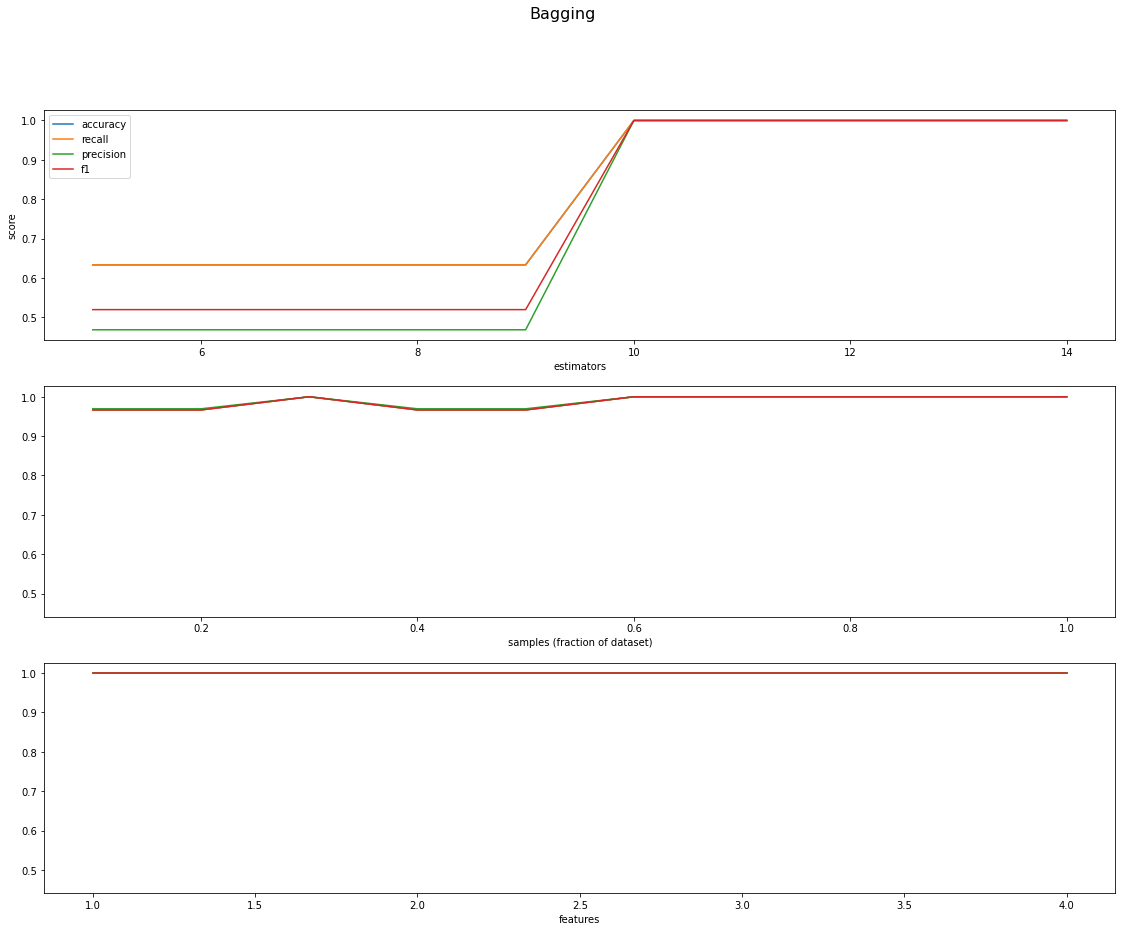

In [12]:
plot_bagging(dataset)

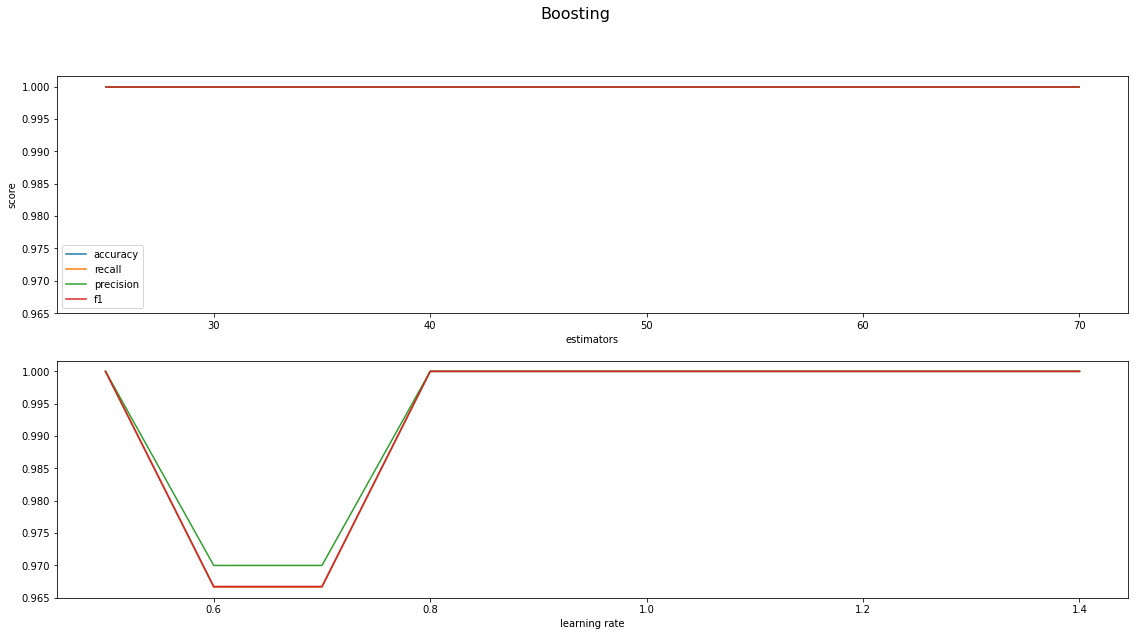

In [13]:
plot_boost(dataset)

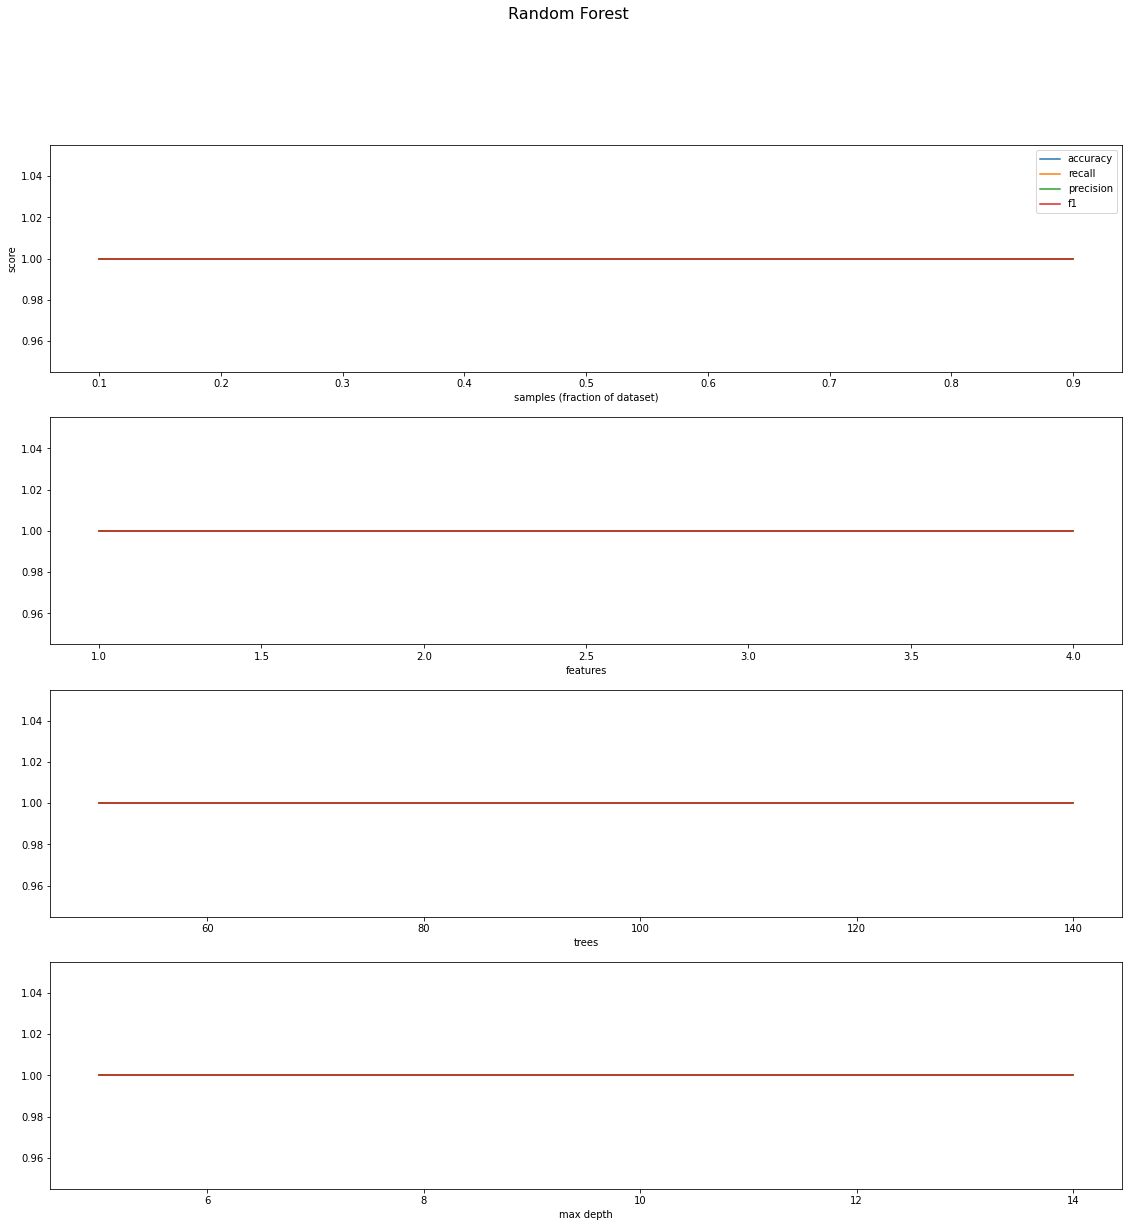

In [14]:
plot_forest(dataset)

# Wine

In [15]:
dataset = wine

In [16]:
data = split_data(dataset)
test_model(get_estimator(), *data)

Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
Precision: 0.5671296296296295
F1: 0.5951417004048583


Without bootstrap
Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
Precision: 0.5671296296296295
F1: 0.5951417004048583

With bootstrap
Accuracy: 0.8611111111111112
Recall: 0.8611111111111112
Precision: 0.8760893246187363
F1: 0.8626321110192079


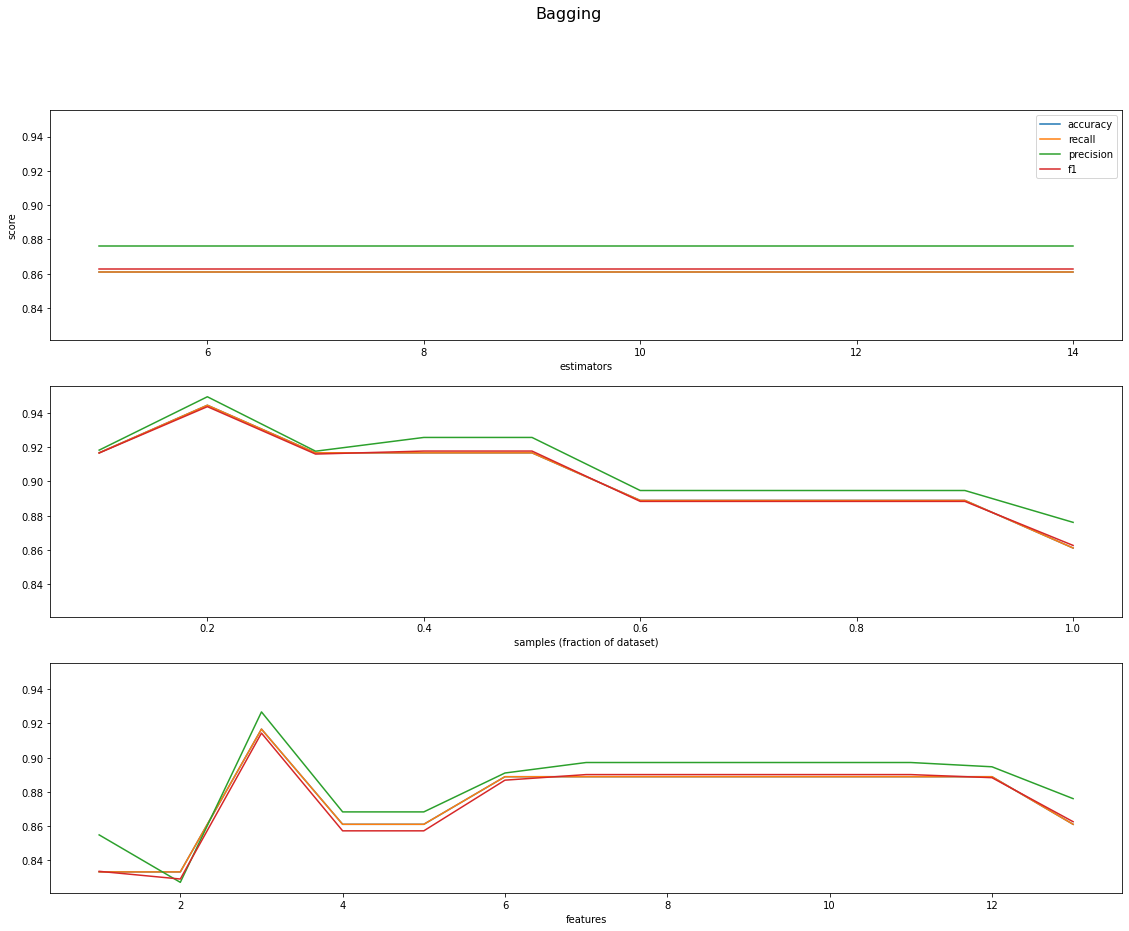

In [17]:
plot_bagging(dataset)

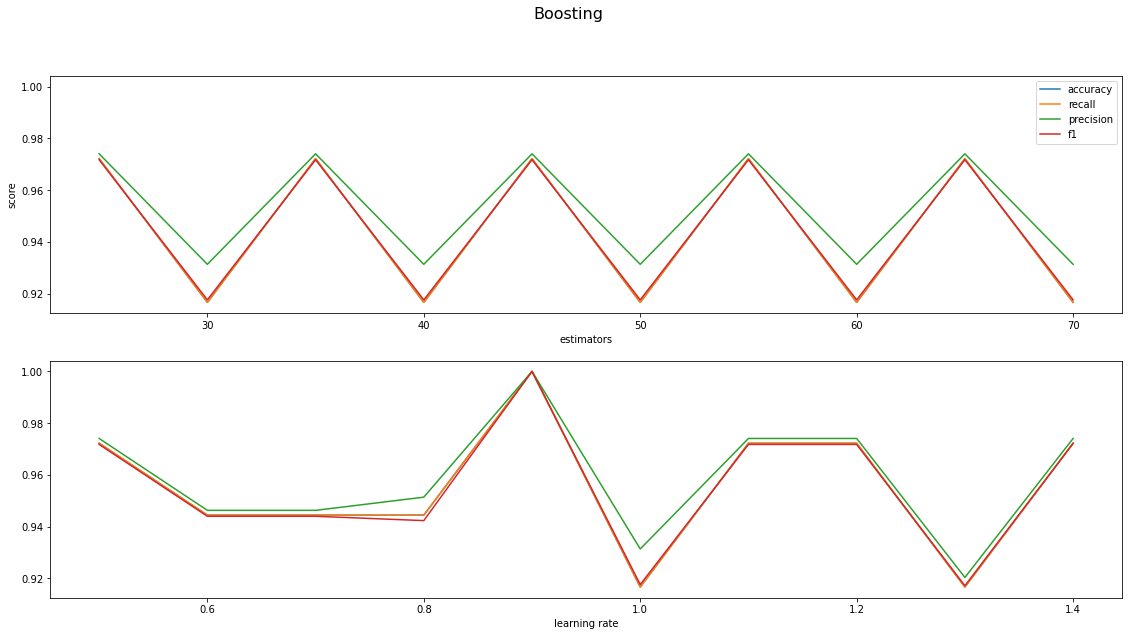

In [18]:
plot_boost(dataset)

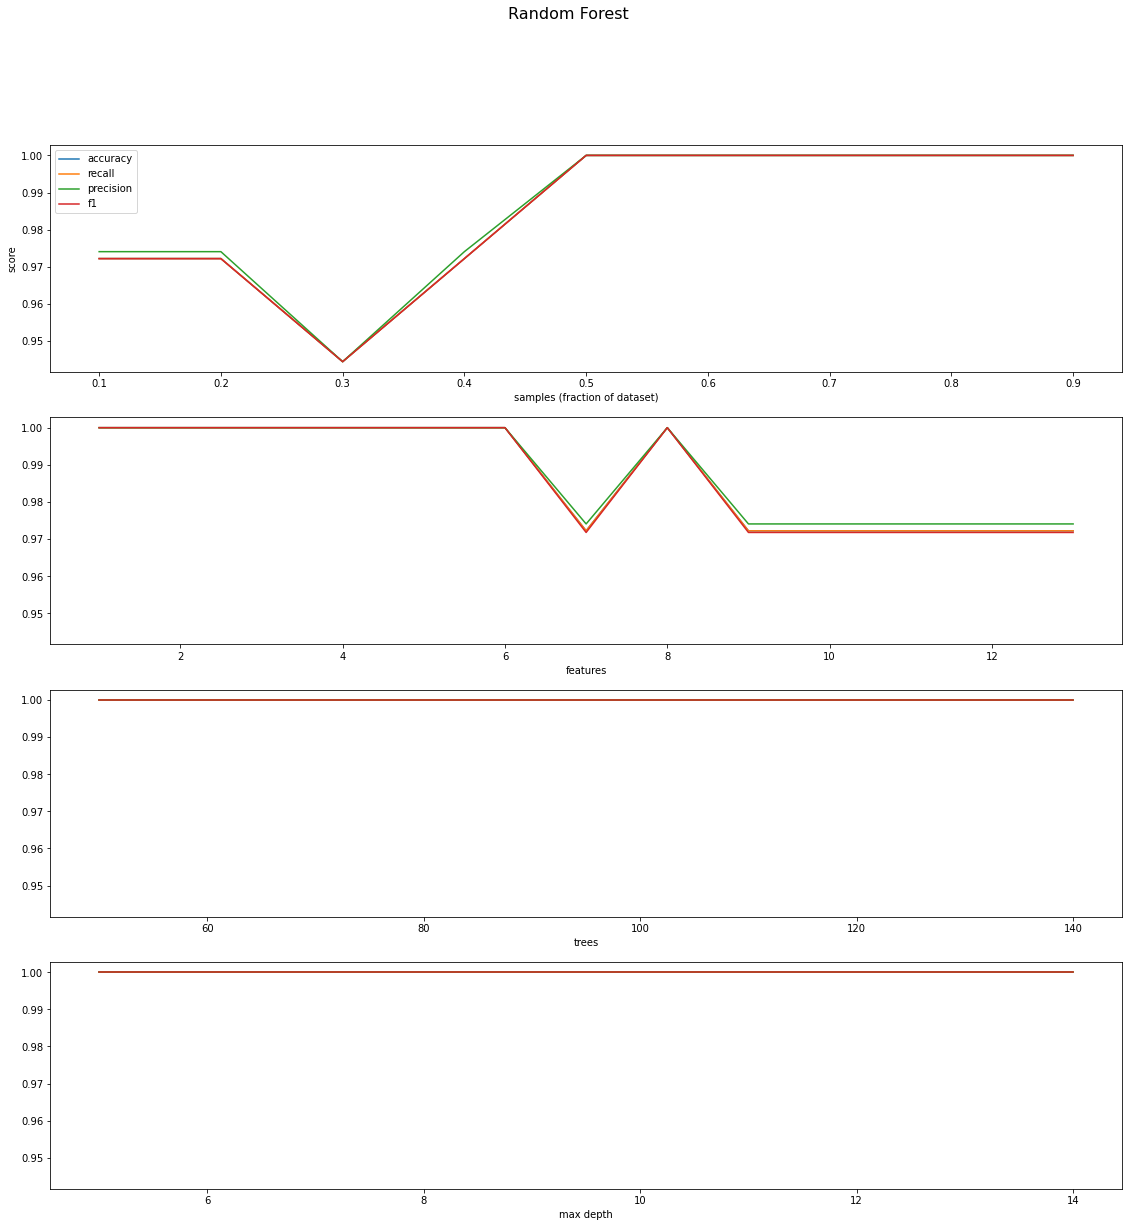

In [19]:
plot_forest(dataset)

# Glass

In [20]:
dataset = glass

In [21]:
data = split_data(dataset)
test_model(get_estimator(), *data)

Accuracy: 0.5116279069767442
Recall: 0.5116279069767442
Precision: 0.3162790697674419
F1: 0.37209302325581395


Without bootstrap
Accuracy: 0.5116279069767442
Recall: 0.5116279069767442
Precision: 0.3162790697674419
F1: 0.37209302325581395

With bootstrap
Accuracy: 0.6511627906976745
Recall: 0.6511627906976745
Precision: 0.5172888616891065
F1: 0.5689922480620155


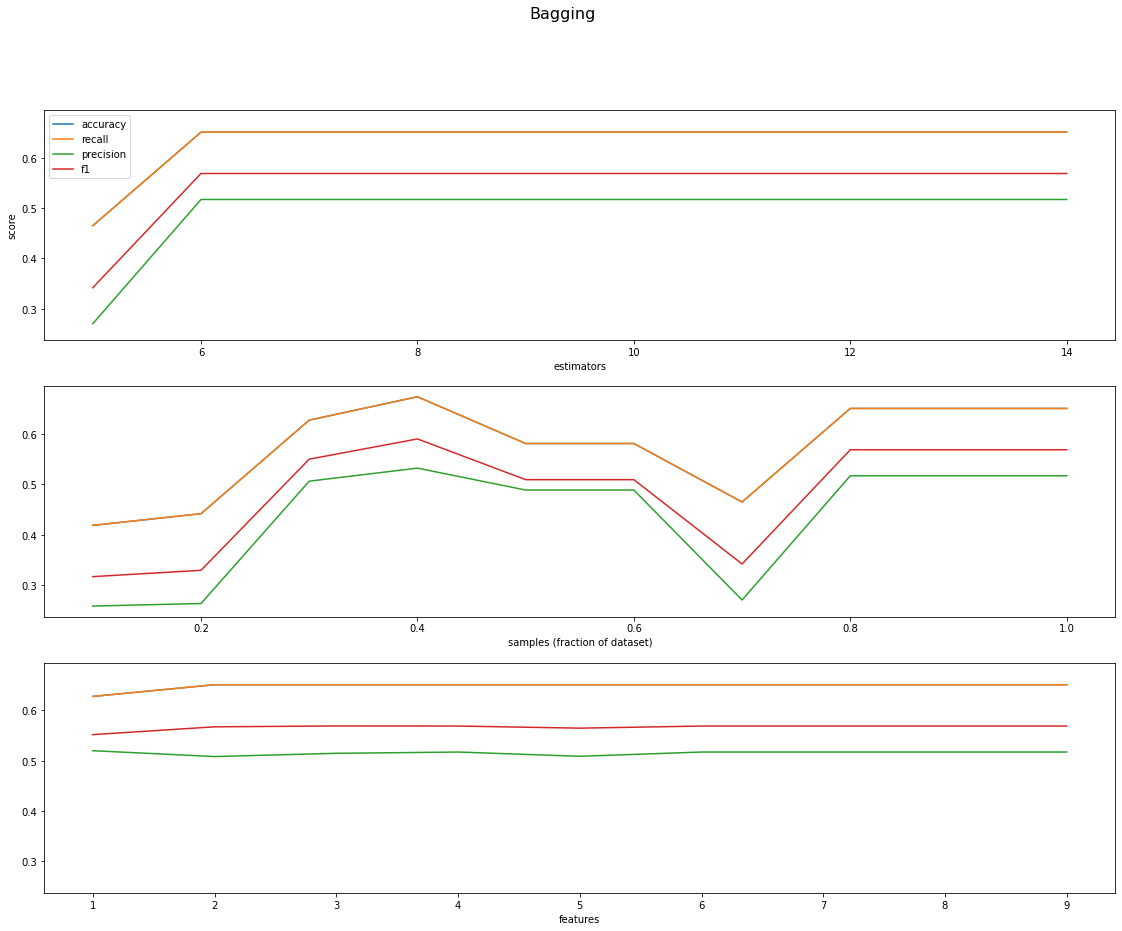

In [22]:
plot_bagging(dataset)

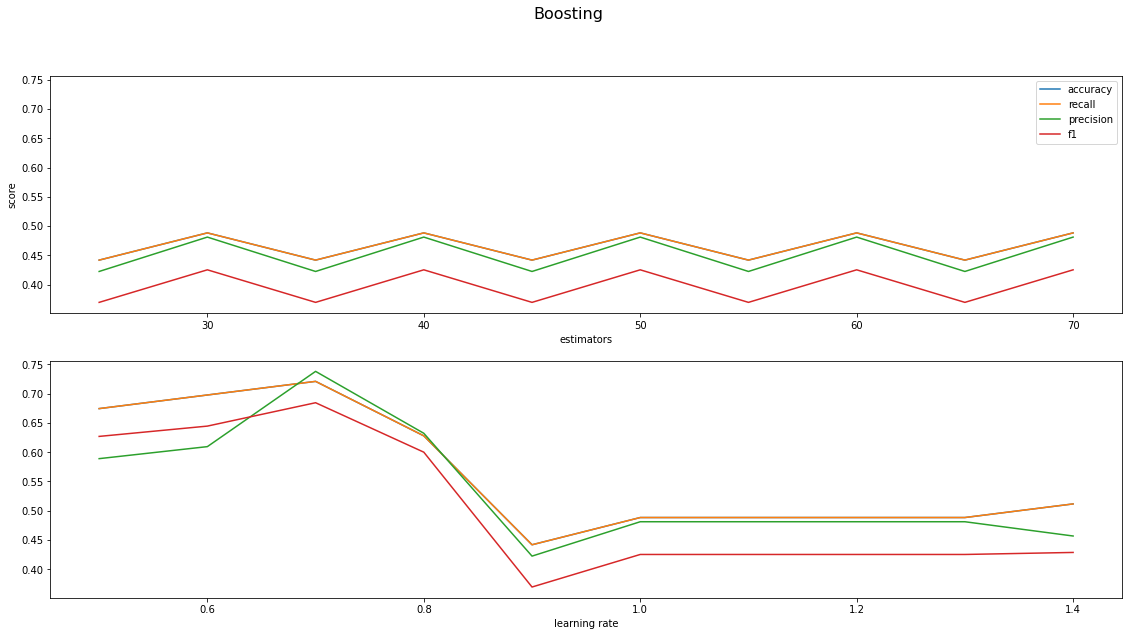

In [23]:
plot_boost(dataset)

In [24]:
plot_forest(dataset)

# Seeds

In [25]:
dataset = seeds

In [26]:
data = split_data(dataset)
test_model(get_estimator(), *data)

Accuracy: 0.5952380952380952
Recall: 0.5952380952380952
Precision: 0.4362244897959183
F1: 0.48107448107448103


Without bootstrap
Accuracy: 0.5952380952380952
Recall: 0.5952380952380952
Precision: 0.4362244897959183
F1: 0.48107448107448103

With bootstrap
Accuracy: 0.5952380952380952
Recall: 0.5952380952380952
Precision: 0.4362244897959183
F1: 0.48107448107448103


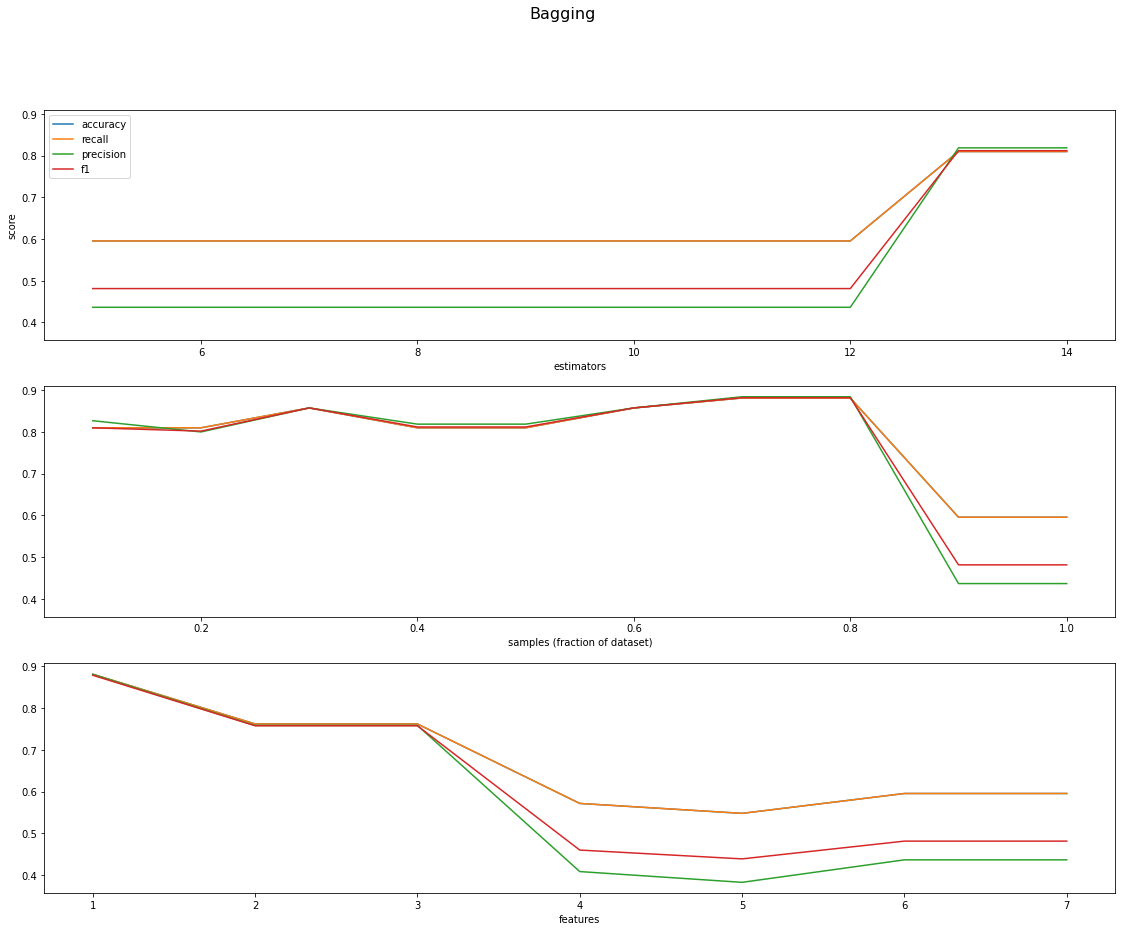

In [27]:
plot_bagging(dataset)

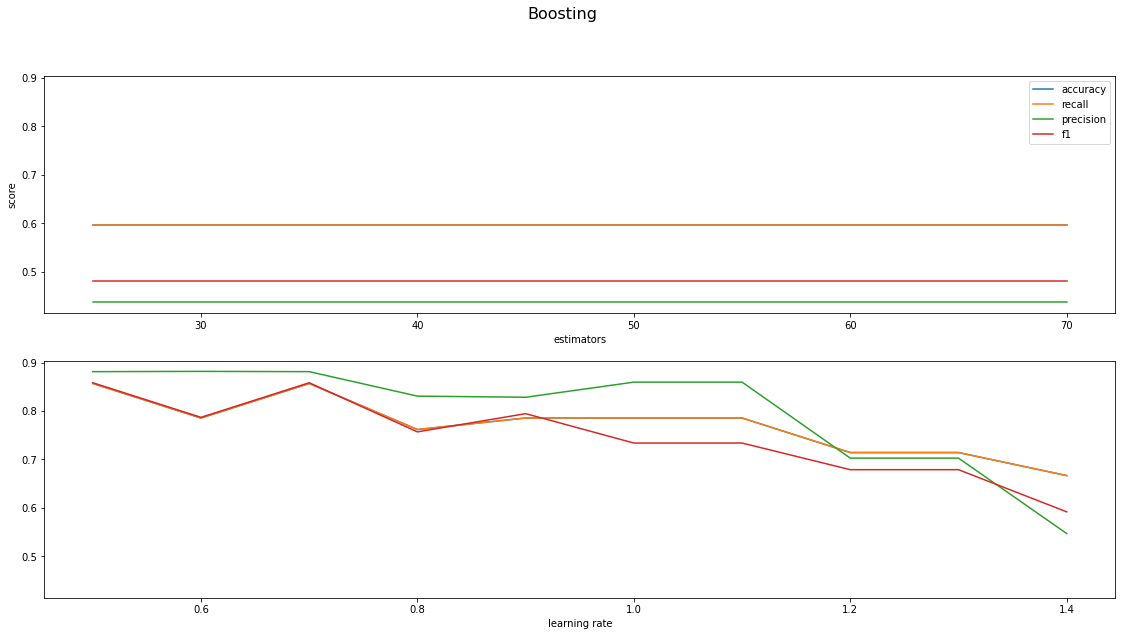

In [28]:
plot_boost(dataset)

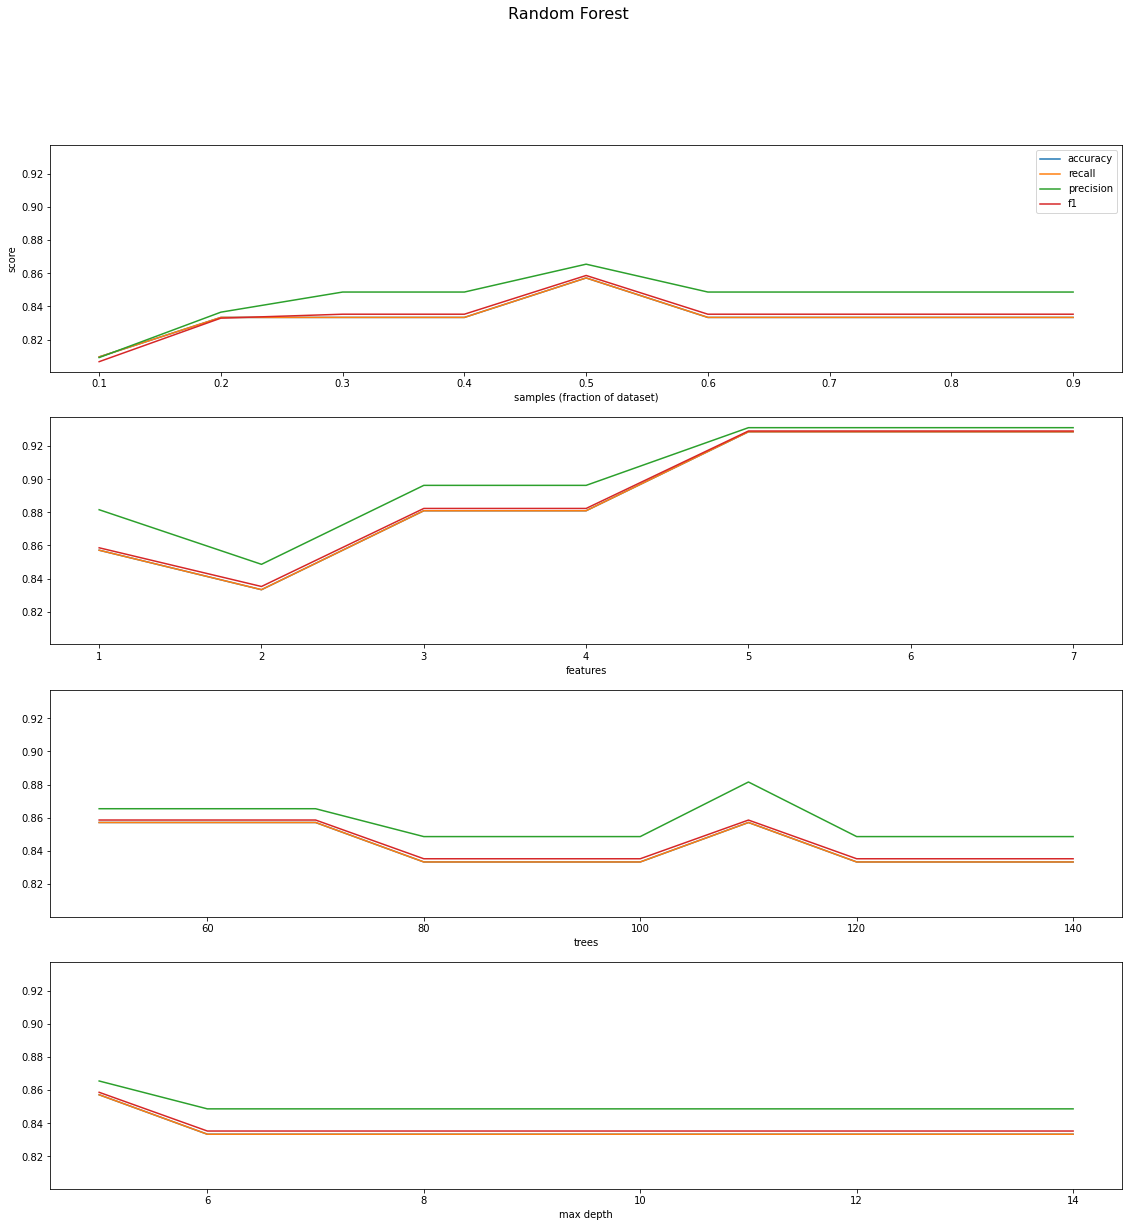

In [29]:
plot_forest(dataset)

# Obserwacje i wnioski

Dla wszystkich 3 zbiorów najlepsze wyniki osiągnął algorytm random forest, ale też najdłużej działał.

Algorytm bagging z reguły działał lepiej dla większej liczby estymatorów. Wpływ liczby próbek i atrybutów zależał od zbioru.

W przypadku AdaBoost wpływ liczby estymatorów znacząco różni się dla wszystkich 3 zbiorów: w Wine działa lepiej dla nieparzystej liczby estymatorów, w Glass dla parzystej, a w Seeds nie ma wpływu na jakość działania. Dla 2 z 3 zbiorów jakość spadała dla zbyt dużego learning rate.

Dla RandomForest jakość predykcji rośnie wraz z ilością próbek dla 2 z 3 zbiorów. Podobnie z ilością atrybutów. Ilość drzew w lesie nie ma wielkiego wpływu na wyniki, a zwiększenie maksymalnej wysokości drzewa poprawia wyniki.

Sposób działania powyższych metod nie wyklucza możliwości użycia walidacji krzyżowej do zmniejszenia zagrożenia przeuczeniem, chociaż te metody same dzielą dane na mniejsze zbiory, co po dodaniu podziału z walidacji krzyżowej mogło by stworzyć przy małych zestawach danych wejściowych. Dodatkowo dla metod z bootstrapem, gdzie próbki pobierane są ze zwracaniem mniejszy zbiór danych może zwiększyć zagrożenie przeuczeniem.